In [2]:
import sys
import pathlib
import numpy as np
import pandas as pd
sys.path.insert(0, "../../scripts")
from utils import load_data


from pycytominer.cyto_utils import infer_cp_features


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.decomposition import PCA
from tensorflow import keras

from vae import VAE

from tensorflow.keras.models import Model, Sequential
import seaborn
import random as python_random
import tensorflow as tf
import pacmap
# import umap
import seaborn as sns

In [3]:
data_splits = ["train", "test", "valid", "complete"]
data_dict = load_data(data_splits)

In [4]:
# Prepare data for training
meta_features = infer_cp_features(data_dict["train"], metadata=True)
cp_features = infer_cp_features(data_dict["train"])

train_features_df = data_dict["train"].reindex(cp_features, axis="columns")
train_meta_df = data_dict["train"].reindex(meta_features, axis="columns")

test_features_df = data_dict["test"].reindex(cp_features, axis="columns")
test_meta_df = data_dict["test"].reindex(meta_features, axis="columns")

valid_features_df = data_dict["valid"].reindex(cp_features, axis="columns")
valid_meta_df = data_dict["valid"].reindex(meta_features, axis="columns")

complete_features_df = data_dict["complete"].reindex(cp_features, axis="columns")
complete_meta_df = data_dict["complete"].reindex(meta_features, axis="columns")

In [5]:
decoder_beta = keras.models.load_model("models/level5Decoder_beta")
encoder_beta = keras.models.load_model("models/level5Encoder_beta")
decoder_vanilla = keras.models.load_model("models/level5Decoder_vanilla")
encoder_vanilla = keras.models.load_model("models/level5Encoder_vanilla")
decoder_mmd = keras.models.load_model("models/level5Decoder_mmd")
encoder_mmd = keras.models.load_model("models/level5Encoder_mmd")

2021-12-20 20:10:14.656529: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-20 20:10:14.656567: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-20 20:10:14.656592: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-10-0-3-81): /proc/driver/nvidia/version does not exist
2021-12-20 20:10:14.659218: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
reconstruction_beta = pd.DataFrame(decoder_beta.predict(encoder_beta.predict(test_features_df)[2]))
reconstruction_beta['label'] = 'β-VAE reconstruction'
reconstruction_vanilla = pd.DataFrame(decoder_vanilla.predict(encoder_vanilla.predict(test_features_df)[2]))
reconstruction_vanilla['label'] = 'Vanilla VAE reconstruction'
reconstruction_mmd = pd.DataFrame(decoder_mmd.predict(encoder_mmd.predict(test_features_df)[2]))
reconstruction_mmd['label'] = 'MMD-VAE reconstruction'

2021-12-20 20:10:19.882271: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [28]:
reconstruction_beta

,0,1,2,3,4,5,6,7,8,9,...,579,580,581,582,583,584,585,586,587,label
0,0.487326,0.574343,0.519737,0.515088,0.586146,0.292804,0.501931,0.803986,0.672214,0.930854,...,0.535660,0.496100,0.575471,0.499644,0.383087,0.468269,0.255850,0.315840,0.287918,β-VAE reconstruction
1,0.596778,0.569682,0.607802,0.501376,0.574910,0.294448,0.487315,0.867389,0.665222,0.699635,...,0.250469,0.228026,0.252618,0.593663,0.492656,0.416622,0.343724,0.390624,0.364987,β-VAE reconstruction
2,0.567363,0.582576,0.646749,0.561033,0.570970,0.270374,0.495444,0.849383,0.707643,0.737063,...,0.238023,0.235873,0.254836,0.558064,0.470641,0.387832,0.315342,0.372073,0.340221,β-VAE reconstruction
3,0.479195,0.558312,0.552091,0.542614,0.594439,0.284297,0.511624,0.802664,0.684127,0.772259,...,0.340609,0.320139,0.348565,0.603228,0.536670,0.453865,0.348432,0.351987,0.344756,β-VAE reconstruction
4,0.614904,0.567492,0.615379,0.493957,0.575250,0.304889,0.477964,0.862933,0.660428,0.674294,...,0.223885,0.202360,0.226154,0.584071,0.482389,0.433728,0.344853,0.389325,0.363137,β-VAE reconstruction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,0.601932,0.567607,0.621398,0.499757,0.564960,0.290722,0.473755,0.880428,0.660761,0.649814,...,0.181286,0.164896,0.178139,0.582443,0.474655,0.404329,0.326744,0.374468,0.348189,β-VAE reconstruction
1033,0.575413,0.575234,0.590275,0.495578,0.580723,0.301041,0.488811,0.856223,0.665360,0.701299,...,0.246312,0.228247,0.246754,0.608021,0.507070,0.413264,0.352993,0.398830,0.375171,β-VAE reconstruction
1034,0.534518,0.584927,0.595393,0.541742,0.566971,0.273455,0.494660,0.834159,0.689658,0.746119,...,0.249885,0.245336,0.263777,0.567609,0.478171,0.377017,0.316453,0.369670,0.340183,β-VAE reconstruction
1035,0.624586,0.577315,0.624743,0.510153,0.577569,0.305938,0.486107,0.867011,0.677268,0.695981,...,0.249356,0.237531,0.257088,0.565216,0.468596,0.430012,0.329338,0.373751,0.345253,β-VAE reconstruction


In [7]:
simulated_test_df = pd.DataFrame(np.random.normal(size=(1037, 10)), columns=np.arange(0,10))
reconstruction_of_simulated_test_beta = pd.DataFrame(decoder_beta.predict(simulated_test_df))
reconstruction_of_simulated_test_beta['label'] = 'β-VAE simulation'
reconstruction_of_simulated_test_vanilla = pd.DataFrame(decoder_vanilla.predict(simulated_test_df))
reconstruction_of_simulated_test_vanilla['label'] = 'Vanilla VAE simulation'

reconstruction_of_simulated_test_mmd = pd.DataFrame(decoder_mmd.predict(simulated_test_df))
reconstruction_of_simulated_test_mmd['label'] = 'MMD-VAE simulation'
test_features_df.columns = np.arange(0,588)
test_features_df['label'] = 'Original'

In [53]:
beta_df = pd.concat([test_features_df, reconstruction_beta,reconstruction_of_simulated_test_beta])

beta_df = beta_df.sample(frac=1).reset_index(drop=True)

mmd_df = pd.concat([test_features_df,reconstruction_mmd,reconstruction_of_simulated_test_mmd])
vanilla_df = pd.concat([test_features_df,reconstruction_vanilla,reconstruction_of_simulated_test_vanilla])
vanilla_df = vanilla_df.sample(frac=1).reset_index(drop=True)

# labels_beta = beta_df.label.reset_index(drop=True)
# labels_mmd = mmd_df.label.reset_index(drop=True)
labels_vanilla = vanilla_df.label.reset_index(drop=True)

# beta_df = beta_df.drop('label', axis = 1)
# mmd_df = mmd_df.drop('label', axis = 1)
vanilla_df = vanilla_df.drop('label', axis = 1)

In [54]:
embedding_beta = pd.DataFrame(reducer.fit_transform(beta_df))
embedding_beta = pd.concat([embedding_beta, labels_beta], axis =1 ).rename(columns = {'label': ''})
sns.scatterplot(data=embedding_beta, x = 0, y=1, hue='', alpha=0.5, s=10)
# b = pd.DataFrame(reducer.fit_transform(original_embedding))
# sns.scatterplot(data=a, x = 0, y=1, alpha=1, s=5)
# sns.scatterplot(data=b, x = 0, y=1, alpha=1, s=5)

ValueError: could not convert string to float: 'β-VAE reconstruction'

In [20]:
reducer = pacmap.PaCMAP(random_state=123)

In [21]:
original_embedding = pd.DataFrame(reducer.fit_transform(test_features_df.drop('label', axis=1)))

<AxesSubplot:xlabel='0', ylabel='1'>

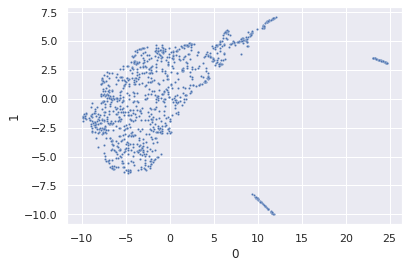

In [22]:
sns.scatterplot(data=original_embedding, x = 0, y=1, alpha=1, s=5)

In [23]:
embedding_beta = pd.DataFrame(reducer.fit_transform(beta_df))
embedding_mmd = pd.DataFrame(reducer.fit_transform(mmd_df))
embedding_vanilla = pd.DataFrame(reducer.fit_transform(vanilla_df))

In [24]:
embedding_beta = pd.concat([embedding_beta, labels_beta], axis =1 ).rename(columns = {'label': ''})
embedding_mmd = pd.concat([embedding_mmd, labels_mmd], axis =1 ).rename(columns = {'label': ''})
embedding_vanilla = pd.concat([embedding_vanilla, labels_vanilla], axis =1 ).rename(columns = {'label': ''})

In [25]:
embedding_vanilla

,0,1,
0,8.474501,-4.428469,Original
1,-1.622328,-2.734839,Original
2,3.966048,4.320795,Original
3,5.966951,4.474277,Original
4,-5.711802,-0.755173,Original
...,...,...,...
3106,-0.003227,0.000257,Vanilla VAE simulation
3107,0.011712,-0.001747,Vanilla VAE simulation
3108,-0.010093,-0.003842,Vanilla VAE simulation
3109,-0.000158,0.003189,Vanilla VAE simulation


In [26]:
sns.set(font_scale=1)

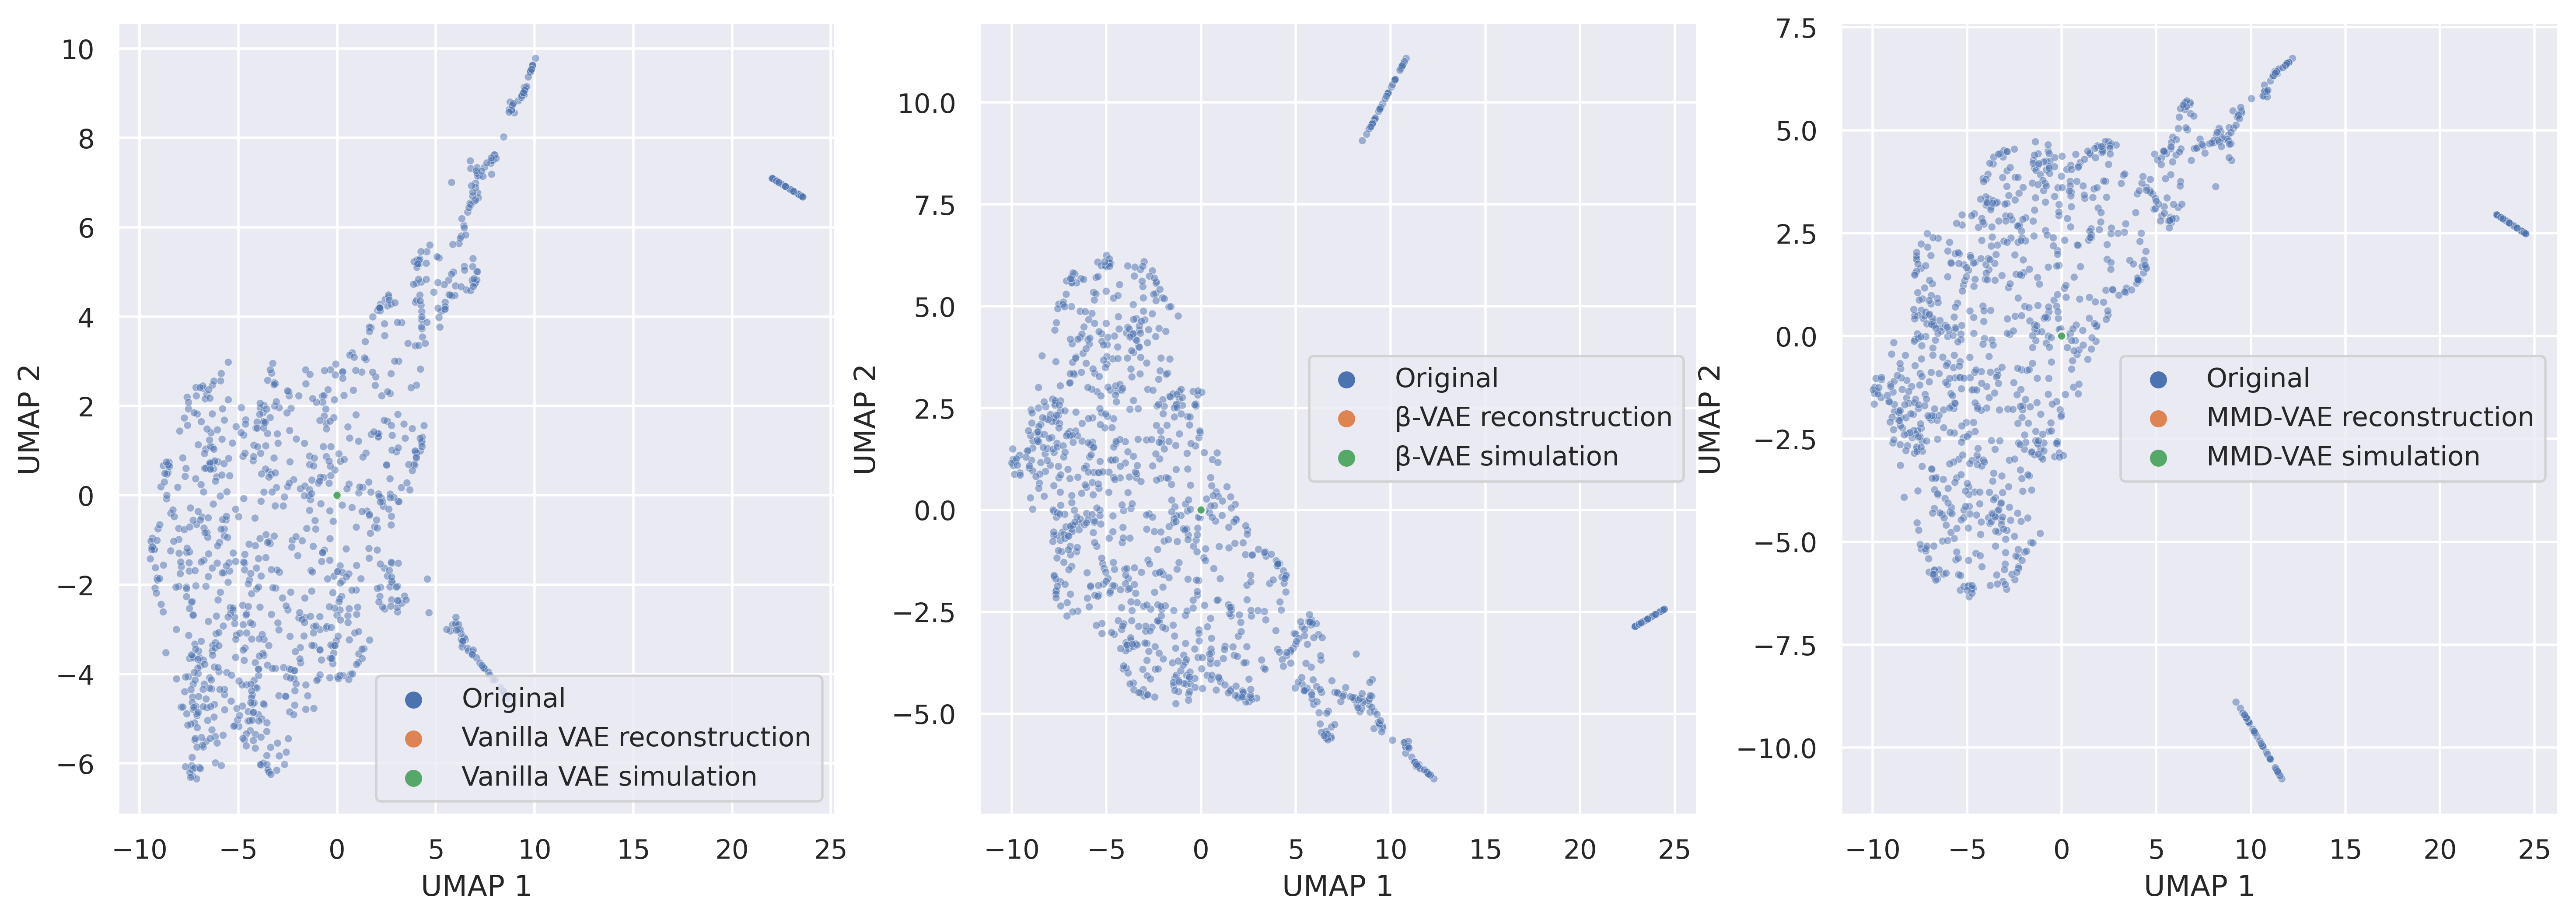

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(18, 6), dpi=400)
sns.scatterplot(data=embedding_vanilla, ax=ax1, x = 0, y=1, hue='', alpha=0.5, s=10
)
ax1.set_xlabel('UMAP 1')
ax1.set_ylabel('UMAP 2')

sns.scatterplot(data=embedding_beta, ax=ax2, x = 0, y=1, hue='', alpha=0.5, s=10
)
ax2.set_xlabel('UMAP 1')
ax2.set_ylabel('UMAP 2')

sns.scatterplot(data=embedding_mmd, ax=ax3, x = 0, y=1, hue='', alpha=0.5, s=10
)
ax3.set_xlabel('UMAP 1')
ax3.set_ylabel('UMAP 2')

plt.show()